In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Reading an Image
import cv2
img = cv2.imread(r"/content/IMG.jpg",0)

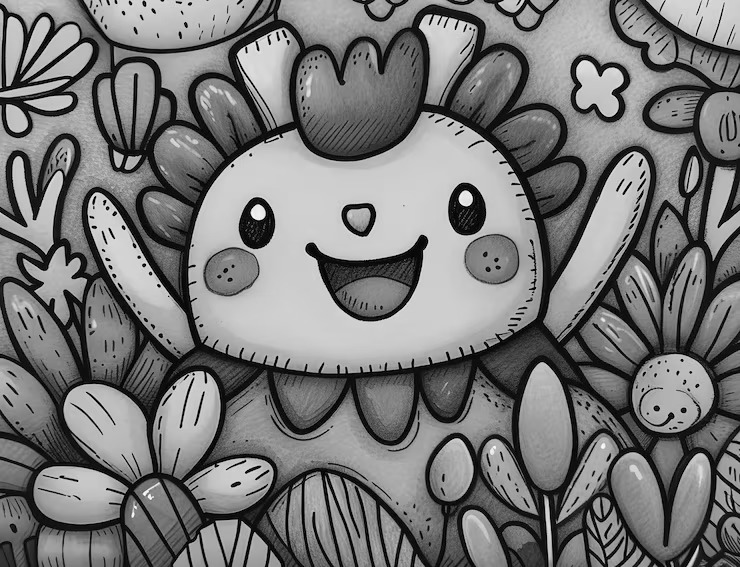

In [ ]:
#Display an Image - using Google Colab
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
# Obtain number of rows and columns
rows,cols = img.shape

In [ ]:
print("Rows of image is : ",rows)
print("Columns of image is : ",cols)

Rows of image is :  567
Columns of image is :  740


In [ ]:
x = np.arange(rows).reshape(rows, 1)
y = np.arange(cols).reshape(1, cols)


In [ ]:
print(x)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [ ]:
print(y)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
  126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
  144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
  162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
  216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
  234 235 236 237 238 239 240 241 242 

In [ ]:
centered_img = img * ((-1) ** (x + y))

In [ ]:
# Step 3: FFT
F = np.fft.fft2(centered_img)

In [ ]:
# Step 4: Create Ideal Low Pass Filter H(u,v)
D0 = 30
u = np.arange(rows)
v = np.arange(cols)
u, v = np.meshgrid(u - rows//2, v - cols//2, indexing='ij')
D = np.sqrt(u**2 + v**2)

#IDEAL HIGH PASS FILTER

In [ ]:
H_ideal = np.zeros_like(D)
H_ideal[D <= D0] = 0
H_ideal[D>D0] = 1

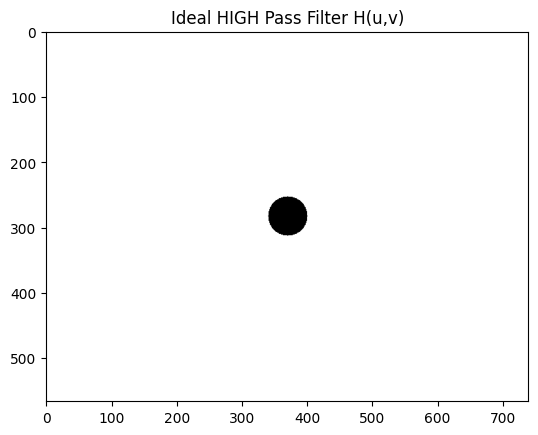

In [ ]:
plt.title("Ideal HIGH Pass Filter H(u,v)")
plt.imshow(H_ideal, cmap='gray')


In [ ]:
# Step 5: Multiply F*H
G_ideal = F * H_ideal

In [ ]:
# Step 6: ifftshift (to undo centering)
G_shift_ideal = np.fft.ifftshift(G_ideal)

In [ ]:
# Step 7: Inverse FFT
g_ideal = np.fft.ifft2(G_shift_ideal)

In [ ]:
# Step 8: Take abs
g_ideal = np.abs(g_ideal)

Original Image


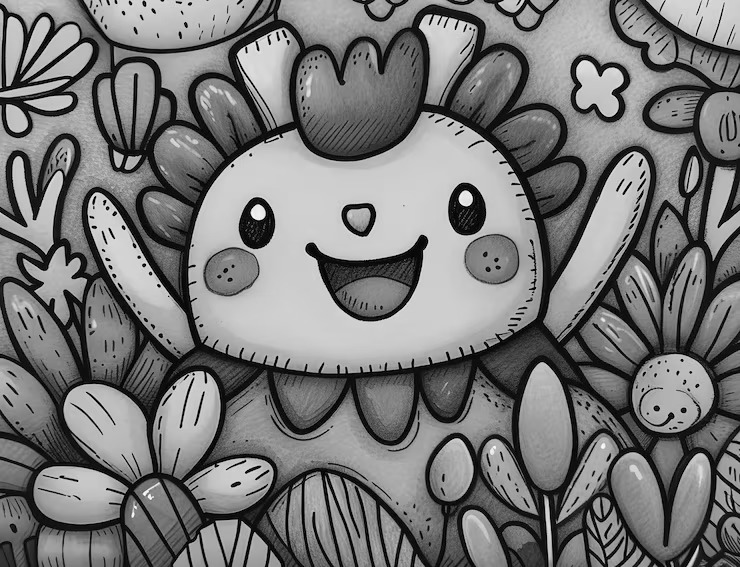

Ideal HIGH Pass Filtered Image


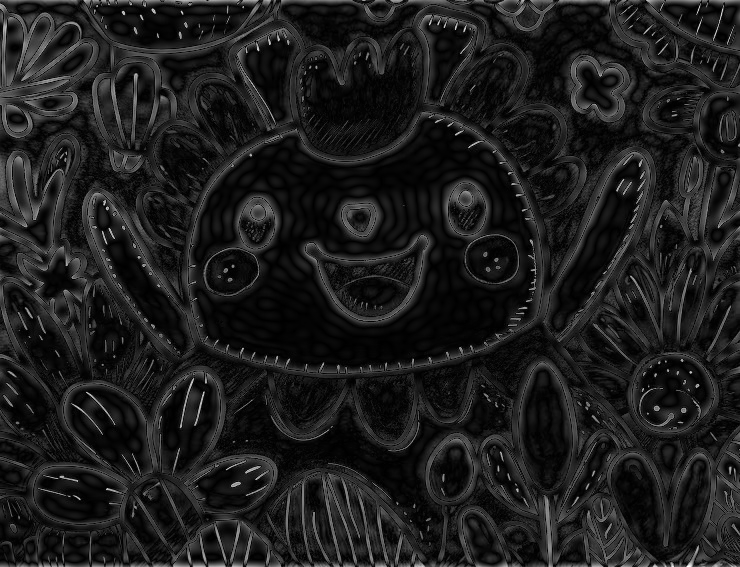

In [ ]:
print("Original Image")
cv2_imshow(img)
print("Ideal HIGH Pass Filtered Image")
cv2_imshow(g_ideal)

#BUTTERWORTH HIGH PASS FILTER

In [ ]:
n = 2 #Order
H_butter = np.zeros_like(D)
H_butter = 1 / (1 + (D0 / D)**(2 * n))


/tmp/ipython-input-1300167064.py:3: RuntimeWarning: divide by zero encountered in divide
  H_butter = 1 / (1 + (D0 / D)**(2 * n))


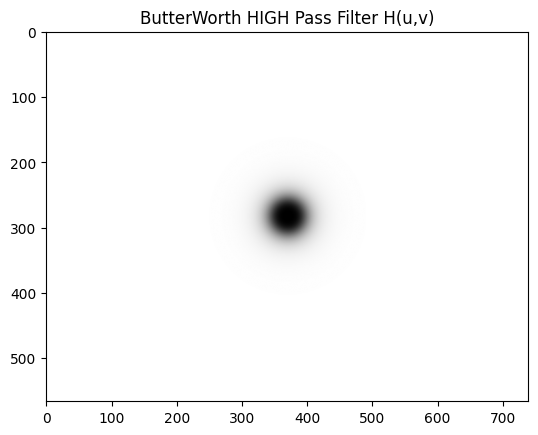

In [ ]:
plt.title("ButterWorth HIGH Pass Filter H(u,v)")
plt.imshow(H_butter, cmap='gray')


In [ ]:
# Step 5: Multiply F*H
G_butter = F * H_butter

In [ ]:
# Step 6: ifftshift (to undo centering)
G_shift_butter = np.fft.ifftshift(G_butter)

In [ ]:
# Step 7: Inverse FFT
g_butter = np.fft.ifft2(G_shift_butter)

In [ ]:
# Step 8: Take abs
g_butter = np.abs(g_butter)

Original Image


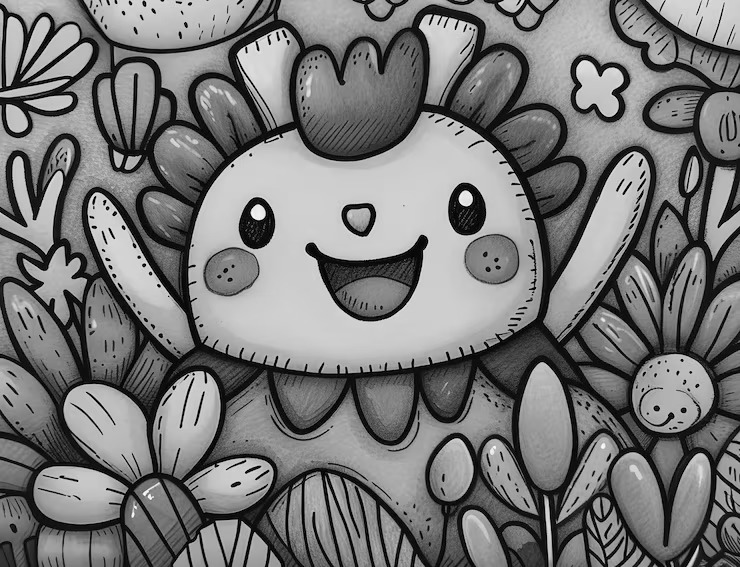

ButterWorth HIGH Pass Filtered Image


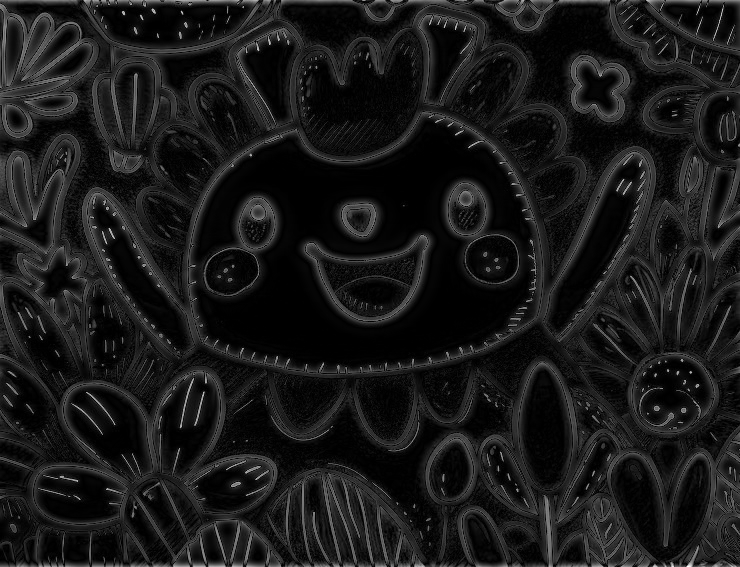

In [ ]:
print("Original Image")
cv2_imshow(img)
print("ButterWorth HIGH Pass Filtered Image")
cv2_imshow(g_butter)

#Gaussian HIGH Pass Filter

In [ ]:
n = 2 #Order
H_gaussian = np.zeros_like(D)
H_gaussian = 1-np.exp(-(D**2) / (2 * (D0**2)))


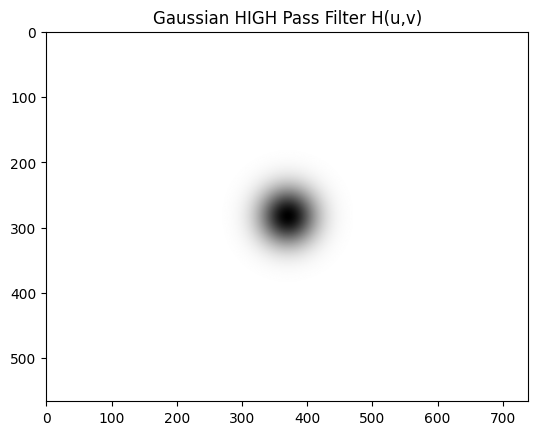

In [ ]:
plt.title("Gaussian HIGH Pass Filter H(u,v)")
plt.imshow(H_gaussian, cmap='gray')


In [ ]:
# Step 5: Multiply F*H
G_gaussian = F * H_gaussian

In [ ]:
# Step 6: ifftshift (to undo centering)
G_shift_gaussian = np.fft.ifftshift(G_gaussian)

In [ ]:
# Step 7: Inverse FFT
g_gaussian = np.fft.ifft2(G_shift_gaussian)

In [ ]:
# Step 8: Take abs
g_gaussian = np.abs(g_gaussian)

Original Image


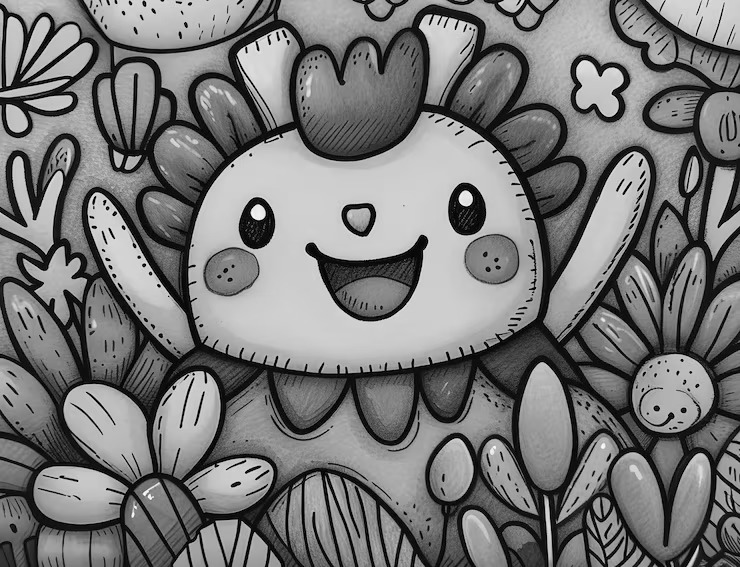

Gaussian HIGH Pass Filtered Image


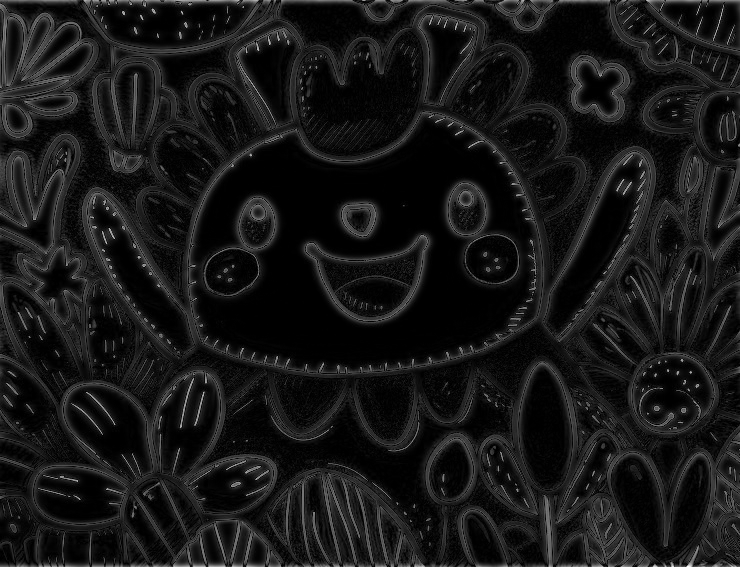

In [ ]:
print("Original Image")
cv2_imshow(img)
print("Gaussian HIGH Pass Filtered Image")
cv2_imshow(g_gaussian)

Original Image


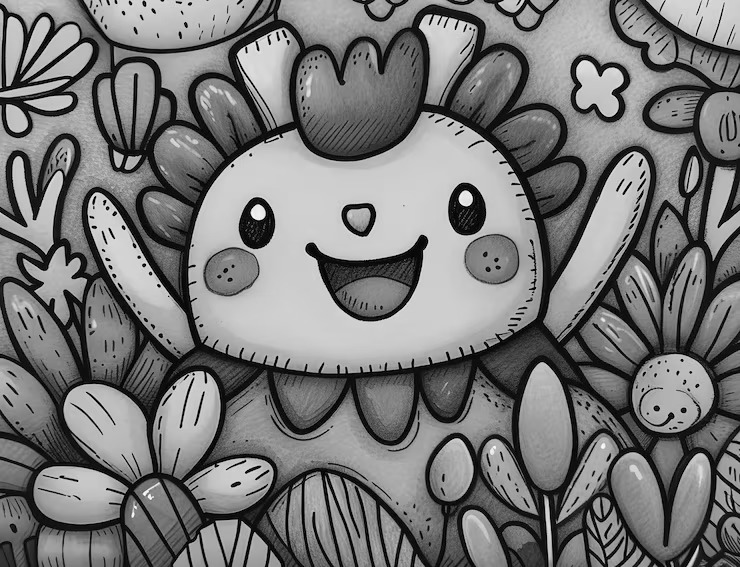

Ideal HIGH Pass Filtered Image


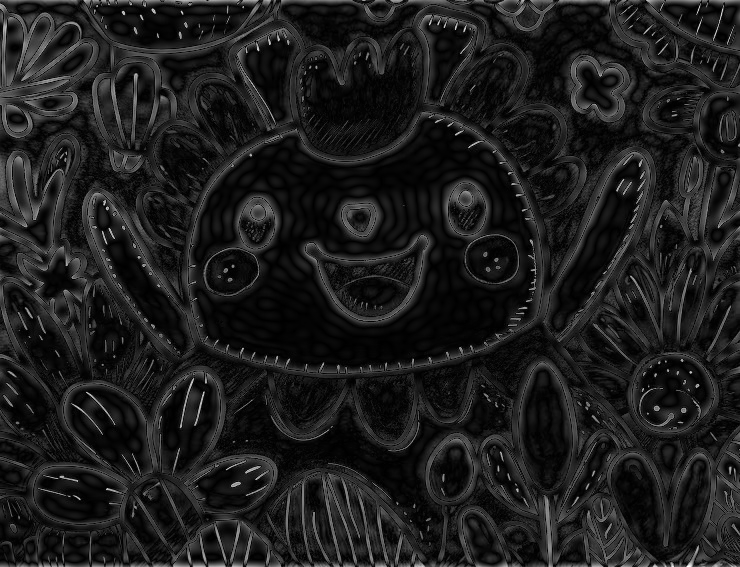

ButterWorth HIGH Pass Filtered Image


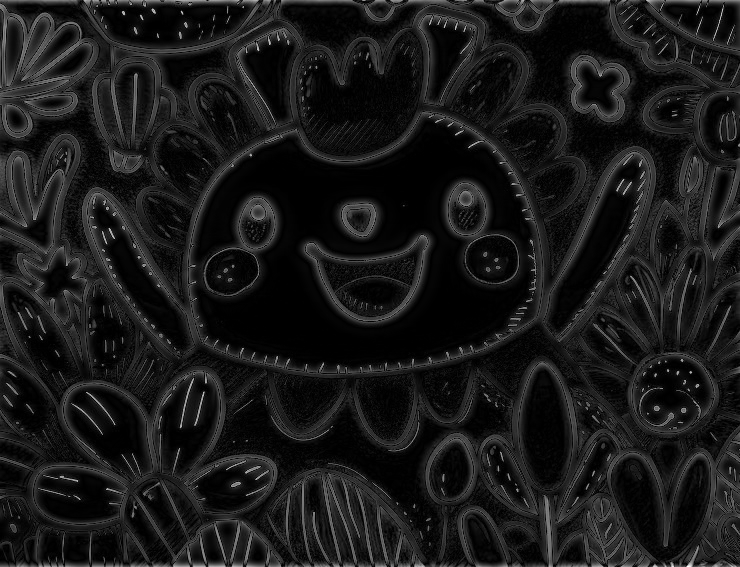

Gaussian HIGH Pass Filtered Image


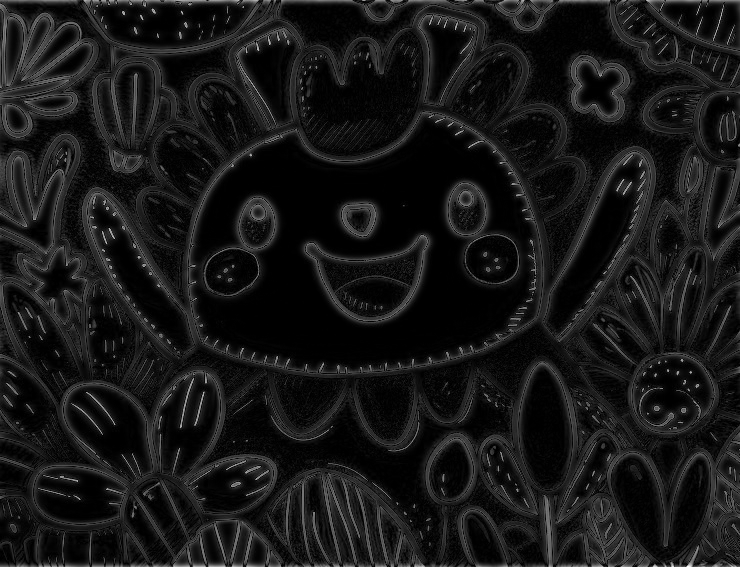

In [ ]:
print("Original Image")
cv2_imshow(img)
print("Ideal HIGH Pass Filtered Image")
cv2_imshow(g_ideal)
print("ButterWorth HIGH Pass Filtered Image")
cv2_imshow(g_butter)
print("Gaussian HIGH Pass Filtered Image")
cv2_imshow(g_gaussian)